# **Modeling**

# Part 1: Preparing the Data

In [513]:
import pandas as pd
import numpy as np
np.random.seed(4)
import os
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [514]:
os.getcwd()

'/workspace'

In [515]:
data = pd.read_csv('Crime_Clean2.csv')

In [516]:
data.head()

,Unnamed: 0,Incident ID,City,Police District Name,Block,Crime Name1,Crime Name2,Crime Name3,Victims,Place,...,Other Race %,Month,Day,Hour_Minute,Hour,Hour_Y,Hour_X,Time_of_Day,Season,Weekday
0,0,201268391,GAITHERSBURG,GERMANTOWN,7001011,Other,All Other Offenses,POLICE INFORMATION,1,Residence - Single Family,...,0.007143,12,2019-12-06,21:16,21,0.707107,-0.707107,Night,Fall,1.0
1,1,201234989,GAITHERSBURG,MONTGOMERY VILLAGE,7001011,Crime Against Person,Fondling,SEX OFFENSE - FONDLING,1,Residence - Single Family,...,0.007143,4,2019-04-13,02:00,2,0.866025,0.500000,Late Night,Spring,0.0
2,2,201281727,GAITHERSBURG,MONTGOMERY VILLAGE,7001011,Other,All Other Offenses,POLICE INFORMATION,1,Residence - Yard,...,0.007143,3,2020-03-13,09:09,9,-0.707107,0.707107,Morning,Winter,1.0
3,3,201265326,GAITHERSBURG,MONTGOMERY VILLAGE,7001011,Other,All Other Offenses,POLICE INFORMATION,1,Residence - Single Family,...,0.007143,11,2019-11-15,16:33,16,-0.500000,-0.866025,Late Afternoon/Early Evening,Fall,1.0
4,4,201090622,GAITHERSBURG,GERMANTOWN,7001011,Other,All Other Offenses,POLICE INFORMATION,1,Street - Other,...,0.007143,7,2016-07-22,22:27,22,0.866025,-0.500000,Night,Summer,1.0


In [517]:
len(data)

235368

In [518]:
data.isnull().sum()

Unnamed: 0                   0
Incident ID                  0
City                       828
Police District Name         0
Block                        0
Crime Name1                165
Crime Name2                165
Crime Name3                165
Victims                      0
Place                        0
Pop                          0
Income                       0
Age                          0
Educational Attainment       0
Bachelors                    0
High School                  0
Means of Transportation      0
Public Transportation        0
Total Laborforce             0
Total Unemployed             0
Start_Date_Time              0
Location                     0
Longitude                    0
Latitude                     0
Male                         0
Female                       0
Black                        0
White                        0
Asian                        0
American Indian              0
Other Race                   0
High School %                0
Bachelor

In [519]:
##Exclude rows for which Crime Name1 is null

data = data[~data['Crime Name1'].isnull()]

In [520]:
data.isnull().sum()

Unnamed: 0                   0
Incident ID                  0
City                       828
Police District Name         0
Block                        0
Crime Name1                  0
Crime Name2                  0
Crime Name3                  0
Victims                      0
Place                        0
Pop                          0
Income                       0
Age                          0
Educational Attainment       0
Bachelors                    0
High School                  0
Means of Transportation      0
Public Transportation        0
Total Laborforce             0
Total Unemployed             0
Start_Date_Time              0
Location                     0
Longitude                    0
Latitude                     0
Male                         0
Female                       0
Black                        0
White                        0
Asian                        0
American Indian              0
Other Race                   0
High School %                0
Bachelor

In [521]:
data = data[~data['City'].isnull()]

In [522]:
len(data)

234375

In [523]:
## Exclude Other category from Analysis

data = data[data['Crime Name1'] != 'Other']
data = data[data['Crime Name1'] != 'Not a Crime']

In [524]:
classes_gen = data['Crime Name1'].value_counts()

top_classes_gen = list(classes_gen.index.values)

top_classes_gen = sorted(top_classes_gen)
top_classes_gen

['Crime Against Person', 'Crime Against Property', 'Crime Against Society']

In [525]:
data = data[data['City'] == 'SILVER SPRING']

In [526]:
len(data)

67791

In [527]:
data = data.drop(['Unnamed: 0','Educational Attainment','Bachelors','High School','Means of Transportation','Public Transportation',
          'Total Laborforce','Total Unemployed', 'Crime Name2','Male','Female','Black','White','Asian','Other Race',
                 'American Indian','Male %', 'Female %','American Indian %', 'Other Race %', 'Asian %','Month','Hour_Minute','Season',
                 'Hour_X','Hour_Y','Hour'],1)

In [528]:
data.columns

Index(['Incident ID', 'City', 'Police District Name', 'Block', 'Crime Name1',
       'Crime Name3', 'Victims', 'Place', 'Pop', 'Income', 'Age',
       'Start_Date_Time', 'Location', 'Longitude', 'Latitude', 'High School %',
       'Bachelors %', 'Public Transportation %', 'Unemployed %', 'White %',
       'Black %', 'Day', 'Time_of_Day', 'Weekday'],
      dtype='object')

In [529]:
len(data)

67791

# Create Geographical Clusters Based Purely on Locations

In [530]:
from sklearn.cluster import KMeans

clusterer = KMeans(n_clusters=5, random_state=4).fit(data[['Latitude','Longitude']])
preds = clusterer.predict(data[['Latitude','Longitude']])
data['Cluster_No'] = preds

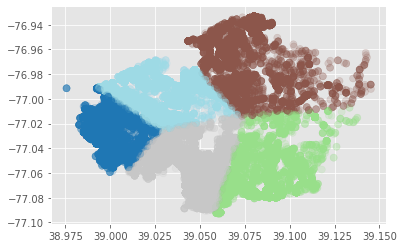

In [531]:
X = np.array(data[['Latitude','Longitude']], dtype='float64')
plt.scatter(X[:,0],X[:,1], alpha=0.2, s=50, c = data['Cluster_No'], cmap='tab20')
plt.show()

In [532]:
data_clust = data[['Cluster_No','Latitude','Longitude']]

data_clust2 = pd.DataFrame(data_clust.groupby(['Cluster_No']).mean())

In [533]:
data = pd.merge(data_clust2, data, how='left', on='Cluster_No')

In [534]:
data = data.drop(['Block','Location'],axis=1)

In [535]:
data.head()

,Cluster_No,Latitude_x,Longitude_x,Incident ID,City,Police District Name,Crime Name1,Crime Name3,Victims,Place,...,Latitude_y,High School %,Bachelors %,Public Transportation %,Unemployed %,White %,Black %,Day,Time_of_Day,Weekday
0,0,38.99634,-77.02561,201296741,SILVER SPRING,SILVER SPRING,Crime Against Property,LARCENY (DESCRIBE OFFENSE),1,Laundromat,...,38.998235,0.154814,0.232851,0.287889,0.064264,0.362933,0.448473,2020-08-01,Late Night,0.0
1,0,38.99634,-77.02561,201273180,SILVER SPRING,SILVER SPRING,Crime Against Society,DRIVING UNDER THE INFLUENCE LIQUOR,1,Street - In vehicle,...,38.998235,0.154814,0.232851,0.287889,0.064264,0.362933,0.448473,2020-01-10,Morning,1.0
2,0,38.99634,-77.02561,201087466,SILVER SPRING,SILVER SPRING,Crime Against Society,DRUGS - COCAINE - POSSESS,1,Parking Lot - Commercial,...,38.998246,0.154814,0.232851,0.287889,0.064264,0.362933,0.448473,2016-07-02,Late Afternoon/Early Evening,0.0
3,0,38.99634,-77.02561,201088757,SILVER SPRING,SILVER SPRING,Crime Against Society,DRUGS - COCAINE - POSSESS,1,Street - Commercial,...,38.998246,0.154814,0.232851,0.287889,0.064264,0.362933,0.448473,2016-07-11,Late Night,1.0
4,0,38.99634,-77.02561,201088757,SILVER SPRING,SILVER SPRING,Crime Against Society,DRUGS - NARCOTIC EQUIP - POSSESS,1,Street - Commercial,...,38.998246,0.154814,0.232851,0.287889,0.064264,0.362933,0.448473,2016-07-11,Late Night,1.0


In [536]:
data['Crimes Against Society Count'] = 0
data['Crimes Against Property Count'] = 0
data['Crimes Against Persons Count'] = 0

# Group the Data by Cluster and Day

In [537]:
df = data.groupby(['Cluster_No','Day']).size().reset_index(name='Count')
df

,Cluster_No,Day,Count
0,0,2016-07-01,27
1,0,2016-07-02,9
2,0,2016-07-03,11
3,0,2016-07-04,11
4,0,2016-07-05,17
...,...,...,...
8328,4,2021-02-01,1
8329,4,2021-02-02,3
8330,4,2021-02-03,3
8331,4,2021-02-04,2


In [538]:
df2 = data.groupby(['Cluster_No','Day','Crime Name1']).size().reset_index(name='Count')
df2

,Cluster_No,Day,Crime Name1,Count
0,0,2016-07-01,Crime Against Person,1
1,0,2016-07-01,Crime Against Property,13
2,0,2016-07-01,Crime Against Society,13
3,0,2016-07-02,Crime Against Person,1
4,0,2016-07-02,Crime Against Property,2
...,...,...,...,...
19582,4,2021-02-03,Crime Against Person,1
19583,4,2021-02-03,Crime Against Property,2
19584,4,2021-02-04,Crime Against Person,1
19585,4,2021-02-04,Crime Against Property,1


In [539]:
df2 = data[data['Crime Name1'] == 'Crime Against Person'].groupby(['Cluster_No','Day']).size().reset_index(name='Crime Against Person Count')
df2

,Cluster_No,Day,Crime Against Person Count
0,0,2016-07-01,1
1,0,2016-07-02,1
2,0,2016-07-03,1
3,0,2016-07-04,1
4,0,2016-07-05,4
...,...,...,...
4694,4,2021-01-27,2
4695,4,2021-01-31,1
4696,4,2021-02-02,1
4697,4,2021-02-03,1


In [540]:
df2b = data[data['Crime Name1'] == 'Crime Against Property'].groupby(['Cluster_No','Day']).size().reset_index(name='Crime Against Property Count')
df2b

,Cluster_No,Day,Crime Against Property Count
0,0,2016-07-01,13
1,0,2016-07-02,2
2,0,2016-07-03,3
3,0,2016-07-04,3
4,0,2016-07-05,4
...,...,...,...
7994,4,2021-02-01,1
7995,4,2021-02-02,2
7996,4,2021-02-03,2
7997,4,2021-02-04,1


In [541]:
df2c = data[data['Crime Name1'] == 'Crime Against Society'].groupby(['Cluster_No','Day']).size().reset_index(name='Crime Against Society Count')
df2c

,Cluster_No,Day,Crime Against Society Count
0,0,2016-07-01,13
1,0,2016-07-02,6
2,0,2016-07-03,7
3,0,2016-07-04,7
4,0,2016-07-05,9
...,...,...,...
6884,4,2021-01-18,3
6885,4,2021-01-20,1
6886,4,2021-01-22,1
6887,4,2021-01-23,1


In [542]:
df3 = data.groupby(['Cluster_No','Day','Place']).size().reset_index(name='Count')
df3

,Cluster_No,Day,Place,Count
0,0,2016-07-01,Bank - ATM,1
1,0,2016-07-01,Other/Unknown,2
2,0,2016-07-01,Park,2
3,0,2016-07-01,Parking Garage - County,2
4,0,2016-07-01,Parking Lot - Commercial,1
...,...,...,...,...
46989,4,2021-02-03,Residence -Townhouse/Duplex,1
46990,4,2021-02-03,Street - In vehicle,1
46991,4,2021-02-04,Other/Unknown,1
46992,4,2021-02-04,Residence -Townhouse/Duplex,1


In [543]:
df4 = data.groupby(['Cluster_No','Day','Time_of_Day']).size().reset_index(name='Count')
df4

,Cluster_No,Day,Time_of_Day,Count
0,0,2016-07-01,Afternoon,5
1,0,2016-07-01,Early Morning,3
2,0,2016-07-01,Late Night,5
3,0,2016-07-01,Morning,5
4,0,2016-07-01,Night,9
...,...,...,...,...
30810,4,2021-02-03,Late Night,1
30811,4,2021-02-03,Night,1
30812,4,2021-02-04,Afternoon,1
30813,4,2021-02-04,Night,1


In [544]:
df5 = data.groupby(['Cluster_No','Day','Weekday']).size().reset_index(name='Count')
df5

,Cluster_No,Day,Weekday,Count
0,0,2016-07-01,1.0,27
1,0,2016-07-02,0.0,9
2,0,2016-07-03,0.0,11
3,0,2016-07-04,1.0,11
4,0,2016-07-05,1.0,17
...,...,...,...,...
8328,4,2021-02-01,1.0,1
8329,4,2021-02-02,1.0,3
8330,4,2021-02-03,1.0,3
8331,4,2021-02-04,1.0,2


In [545]:
df6 = data.groupby(['Cluster_No','Day'])
df6b = df6['Income'].mean().reset_index(name='Mean Income')
df6b


,Cluster_No,Day,Mean Income
0,0,2016-07-01,86366.777778
1,0,2016-07-02,120357.111111
2,0,2016-07-03,75901.636364
3,0,2016-07-04,96261.454545
4,0,2016-07-05,80608.588235
...,...,...,...
8328,4,2021-02-01,114345.000000
8329,4,2021-02-02,107680.333333
8330,4,2021-02-03,94047.666667
8331,4,2021-02-04,127333.500000


In [546]:
df6c = df6['Pop'].mean().reset_index(name='Mean Pop')
df6c

,Cluster_No,Day,Mean Pop
0,0,2016-07-01,2144.037037
1,0,2016-07-02,2470.666667
2,0,2016-07-03,2365.272727
3,0,2016-07-04,2582.909091
4,0,2016-07-05,2338.823529
...,...,...,...
8328,4,2021-02-01,2527.000000
8329,4,2021-02-02,1626.000000
8330,4,2021-02-03,2235.666667
8331,4,2021-02-04,1809.500000


In [547]:
df6d = df6['Public Transportation %'].mean().reset_index(name='Mean Public Transportation %')
df6d

,Cluster_No,Day,Mean Public Transportation %
0,0,2016-07-01,0.331070
1,0,2016-07-02,0.304713
2,0,2016-07-03,0.355246
3,0,2016-07-04,0.299621
4,0,2016-07-05,0.381285
...,...,...,...
8328,4,2021-02-01,0.066867
8329,4,2021-02-02,0.150231
8330,4,2021-02-03,0.129079
8331,4,2021-02-04,0.141691


In [548]:
df6e = df6['Victims'].mean().reset_index(name='Mean Victims')
df6e

,Cluster_No,Day,Mean Victims
0,0,2016-07-01,1.000000
1,0,2016-07-02,1.111111
2,0,2016-07-03,1.000000
3,0,2016-07-04,1.000000
4,0,2016-07-05,1.000000
...,...,...,...
8328,4,2021-02-01,1.000000
8329,4,2021-02-02,1.000000
8330,4,2021-02-03,1.333333
8331,4,2021-02-04,1.000000


In [549]:
df_final = pd.merge(df, df6b, how='left', on=['Cluster_No','Day'])
df_final.head()

,Cluster_No,Day,Count,Mean Income
0,0,2016-07-01,27,86366.777778
1,0,2016-07-02,9,120357.111111
2,0,2016-07-03,11,75901.636364
3,0,2016-07-04,11,96261.454545
4,0,2016-07-05,17,80608.588235


In [550]:
df_final = pd.merge(df_final, df6c, how='left', on=['Cluster_No','Day'])
df_final = pd.merge(df_final, df6d, how='left', on=['Cluster_No','Day'])
df_final = pd.merge(df_final, df6e, how='left', on=['Cluster_No','Day'])
df_final.head()

,Cluster_No,Day,Count,Mean Income,Mean Pop,Mean Public Transportation %,Mean Victims
0,0,2016-07-01,27,86366.777778,2144.037037,0.331070,1.000000
1,0,2016-07-02,9,120357.111111,2470.666667,0.304713,1.111111
2,0,2016-07-03,11,75901.636364,2365.272727,0.355246,1.000000
3,0,2016-07-04,11,96261.454545,2582.909091,0.299621,1.000000
4,0,2016-07-05,17,80608.588235,2338.823529,0.381285,1.000000


In [551]:
df_final2 = pd.merge(data_clust2, df_final, how='left', on='Cluster_No')
df_final2

,Cluster_No,Latitude,Longitude,Day,Count,Mean Income,Mean Pop,Mean Public Transportation %,Mean Victims
0,0,38.99634,-77.025610,2016-07-01,27,86366.777778,2144.037037,0.331070,1.000000
1,0,38.99634,-77.025610,2016-07-02,9,120357.111111,2470.666667,0.304713,1.111111
2,0,38.99634,-77.025610,2016-07-03,11,75901.636364,2365.272727,0.355246,1.000000
3,0,38.99634,-77.025610,2016-07-04,11,96261.454545,2582.909091,0.299621,1.000000
4,0,38.99634,-77.025610,2016-07-05,17,80608.588235,2338.823529,0.381285,1.000000
...,...,...,...,...,...,...,...,...,...
8328,4,39.02779,-76.993919,2021-02-01,1,114345.000000,2527.000000,0.066867,1.000000
8329,4,39.02779,-76.993919,2021-02-02,3,107680.333333,1626.000000,0.150231,1.000000
8330,4,39.02779,-76.993919,2021-02-03,3,94047.666667,2235.666667,0.129079,1.333333
8331,4,39.02779,-76.993919,2021-02-04,2,127333.500000,1809.500000,0.141691,1.000000


In [552]:
df_final2 = pd.merge(df_final2,df2, how='left', on=['Cluster_No','Day'])
df_final2

,Cluster_No,Latitude,Longitude,Day,Count,Mean Income,Mean Pop,Mean Public Transportation %,Mean Victims,Crime Against Person Count
0,0,38.99634,-77.025610,2016-07-01,27,86366.777778,2144.037037,0.331070,1.000000,1.0
1,0,38.99634,-77.025610,2016-07-02,9,120357.111111,2470.666667,0.304713,1.111111,1.0
2,0,38.99634,-77.025610,2016-07-03,11,75901.636364,2365.272727,0.355246,1.000000,1.0
3,0,38.99634,-77.025610,2016-07-04,11,96261.454545,2582.909091,0.299621,1.000000,1.0
4,0,38.99634,-77.025610,2016-07-05,17,80608.588235,2338.823529,0.381285,1.000000,4.0
...,...,...,...,...,...,...,...,...,...,...
8328,4,39.02779,-76.993919,2021-02-01,1,114345.000000,2527.000000,0.066867,1.000000,NaN
8329,4,39.02779,-76.993919,2021-02-02,3,107680.333333,1626.000000,0.150231,1.000000,1.0
8330,4,39.02779,-76.993919,2021-02-03,3,94047.666667,2235.666667,0.129079,1.333333,1.0
8331,4,39.02779,-76.993919,2021-02-04,2,127333.500000,1809.500000,0.141691,1.000000,1.0


In [553]:
df_final2 = pd.merge(df_final2,df2b, how='left', on=['Cluster_No','Day'])
df_final2

,Cluster_No,Latitude,Longitude,Day,Count,Mean Income,Mean Pop,Mean Public Transportation %,Mean Victims,Crime Against Person Count,Crime Against Property Count
0,0,38.99634,-77.025610,2016-07-01,27,86366.777778,2144.037037,0.331070,1.000000,1.0,13.0
1,0,38.99634,-77.025610,2016-07-02,9,120357.111111,2470.666667,0.304713,1.111111,1.0,2.0
2,0,38.99634,-77.025610,2016-07-03,11,75901.636364,2365.272727,0.355246,1.000000,1.0,3.0
3,0,38.99634,-77.025610,2016-07-04,11,96261.454545,2582.909091,0.299621,1.000000,1.0,3.0
4,0,38.99634,-77.025610,2016-07-05,17,80608.588235,2338.823529,0.381285,1.000000,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...
8328,4,39.02779,-76.993919,2021-02-01,1,114345.000000,2527.000000,0.066867,1.000000,NaN,1.0
8329,4,39.02779,-76.993919,2021-02-02,3,107680.333333,1626.000000,0.150231,1.000000,1.0,2.0
8330,4,39.02779,-76.993919,2021-02-03,3,94047.666667,2235.666667,0.129079,1.333333,1.0,2.0
8331,4,39.02779,-76.993919,2021-02-04,2,127333.500000,1809.500000,0.141691,1.000000,1.0,1.0


In [554]:
df_final2 = pd.merge(df_final2,df2c, how='left', on=['Cluster_No','Day'])
df_final2

,Cluster_No,Latitude,Longitude,Day,Count,Mean Income,Mean Pop,Mean Public Transportation %,Mean Victims,Crime Against Person Count,Crime Against Property Count,Crime Against Society Count
0,0,38.99634,-77.025610,2016-07-01,27,86366.777778,2144.037037,0.331070,1.000000,1.0,13.0,13.0
1,0,38.99634,-77.025610,2016-07-02,9,120357.111111,2470.666667,0.304713,1.111111,1.0,2.0,6.0
2,0,38.99634,-77.025610,2016-07-03,11,75901.636364,2365.272727,0.355246,1.000000,1.0,3.0,7.0
3,0,38.99634,-77.025610,2016-07-04,11,96261.454545,2582.909091,0.299621,1.000000,1.0,3.0,7.0
4,0,38.99634,-77.025610,2016-07-05,17,80608.588235,2338.823529,0.381285,1.000000,4.0,4.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8328,4,39.02779,-76.993919,2021-02-01,1,114345.000000,2527.000000,0.066867,1.000000,NaN,1.0,NaN
8329,4,39.02779,-76.993919,2021-02-02,3,107680.333333,1626.000000,0.150231,1.000000,1.0,2.0,NaN
8330,4,39.02779,-76.993919,2021-02-03,3,94047.666667,2235.666667,0.129079,1.333333,1.0,2.0,NaN
8331,4,39.02779,-76.993919,2021-02-04,2,127333.500000,1809.500000,0.141691,1.000000,1.0,1.0,NaN


In [555]:
def func(data, df_final):
    
    for place in np.unique(data['Place']):
        
        df2 = data[data['Place'] == place].groupby(['Cluster_No','Day']).size().reset_index(name=place + " Count")
        df_final = pd.merge(df_final,df2, how='left', on=['Cluster_No','Day'])
        
    return df_final

In [556]:
df_final3 = func(data,df_final2)
df_final3.shape

(8333, 95)

In [557]:
df_final3.head()

,Cluster_No,Latitude,Longitude,Day,Count,Mean Income,Mean Pop,Mean Public Transportation %,Mean Victims,Crime Against Person Count,...,Retail - Video Store Count,School/College Count,Street - Alley Count,Street - Bus Stop Count,Street - Commercial Count,Street - In vehicle Count,Street - Other Count,Street - Residential Count,Theater Count,Wooded Area Count
0,0,38.99634,-77.02561,2016-07-01,27,86366.777778,2144.037037,0.331070,1.000000,1.0,...,NaN,NaN,1.0,NaN,2.0,2.0,NaN,6.0,NaN,NaN
1,0,38.99634,-77.02561,2016-07-02,9,120357.111111,2470.666667,0.304713,1.111111,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
2,0,38.99634,-77.02561,2016-07-03,11,75901.636364,2365.272727,0.355246,1.000000,1.0,...,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
3,0,38.99634,-77.02561,2016-07-04,11,96261.454545,2582.909091,0.299621,1.000000,1.0,...,NaN,NaN,NaN,NaN,NaN,5.0,NaN,1.0,NaN,NaN
4,0,38.99634,-77.02561,2016-07-05,17,80608.588235,2338.823529,0.381285,1.000000,4.0,...,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN


In [558]:
len(df_final3)

8333

In [559]:
data = df_final3.copy()

In [560]:
rand = data[data['Cluster_No'] == 0]
len(rand)

1681

In [561]:
data['Day'] = pd.to_datetime(data['Day'])
data['Day']

0      2016-07-01
1      2016-07-02
2      2016-07-03
3      2016-07-04
4      2016-07-05
          ...    
8328   2021-02-01
8329   2021-02-02
8330   2021-02-03
8331   2021-02-04
8332   2021-02-05
Name: Day, Length: 8333, dtype: datetime64[ns]

# Create and Implement Rolling Window Functions for Each Cluster by Creating Dataframes for Each Cluster

In [562]:
np.unique(data['Cluster_No'])

array([0, 1, 2, 3, 4])

In [563]:
def cluster_week_func(data):
    
    dataframe_list = []
    
    for cluster in np.unique(data['Cluster_No']):
        
        data_new = data[data['Cluster_No'] == cluster].copy()
    
        data_new = data_new.set_index('Day')
        data_new = data_new['2016-07-01':'2021-02-05'].resample('W').sum()
        
        dataframe_list.append(data_new)
        
    return dataframe_list

In [564]:
def crime_count_func(dataframe_list):
    
    for data_new in dataframe_list:
        
        data_new['4 Rolling Crimes Against Society Mean'] = data_new['Crime Against Society Count'].shift(1).rolling(4).mean()
        data_new['4 Rolling Crimes Against Property Mean'] = data_new['Crime Against Property Count'].shift(1).rolling(4).mean()
        data_new['4 Rolling Crimes Against Persons Mean'] = data_new['Crime Against Person Count'].shift(1).rolling(4).mean()

        data_new['2 Rolling Crimes Against Society Mean'] = data_new['Crime Against Society Count'].shift(1).rolling(2).mean()
        data_new['2 Rolling Crimes Against Property Mean'] = data_new['Crime Against Property Count'].shift(1).rolling(2).mean()
        data_new['2 Rolling Crimes Against Persons Mean'] = data_new['Crime Against Person Count'].shift(1).rolling(2).mean()
        
    return dataframe_list

In [565]:
data_final = cluster_week_func(data)
data_final = crime_count_func(data_final)

In [566]:
len(data_final)

5

In [567]:
data_final[0].head(9)

,Cluster_No,Latitude,Longitude,Count,Mean Income,Mean Pop,Mean Public Transportation %,Mean Victims,Crime Against Person Count,Crime Against Property Count,...,Street - Other Count,Street - Residential Count,Theater Count,Wooded Area Count,4 Rolling Crimes Against Society Mean,4 Rolling Crimes Against Property Mean,4 Rolling Crimes Against Persons Mean,2 Rolling Crimes Against Society Mean,2 Rolling Crimes Against Property Mean,2 Rolling Crimes Against Persons Mean
Day,,,,,,,,,,,,,,,,,,,,,
2016-07-03,0,116.98902,-231.07683,47,282625.525253,6979.976431,0.991030,3.111111,3.0,18.0,...,3.0,7.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-10,0,272.97438,-539.17927,92,639961.930143,16901.009406,2.414875,7.250000,12.0,30.0,...,6.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-17,0,272.97438,-539.17927,102,728882.907295,14723.108685,2.201585,7.066667,4.0,43.0,...,4.0,9.0,0.0,0.0,NaN,NaN,NaN,38.0,24.0,7.5
2016-07-24,0,272.97438,-539.17927,80,705149.149675,14394.958604,2.173878,7.125000,7.0,40.0,...,2.0,6.0,0.0,0.0,NaN,NaN,NaN,52.5,36.5,8.0
2016-07-31,0,272.97438,-539.17927,72,641700.917749,15315.164322,2.271693,7.071429,6.0,36.0,...,2.0,5.0,1.0,0.0,41.00,32.75,6.50,44.0,41.5,5.5
2016-08-07,0,272.97438,-539.17927,100,626995.624436,15192.223858,2.227415,7.058824,9.0,38.0,...,1.0,8.0,0.0,0.0,42.00,37.25,7.25,31.5,38.0,6.5
2016-08-14,0,272.97438,-539.17927,66,680954.211538,13875.989316,2.274765,7.000000,7.0,35.0,...,1.0,5.0,0.0,0.0,42.75,39.25,6.50,41.5,37.0,7.5
2016-08-21,0,272.97438,-539.17927,72,638418.028571,15367.695238,2.314939,7.000000,5.0,47.0,...,7.0,11.0,0.0,1.0,35.00,37.25,7.25,38.5,36.5,8.0
2016-08-28,0,272.97438,-539.17927,95,649935.590909,15661.551136,2.319297,7.000000,4.0,50.0,...,3.0,8.0,1.0,0.0,31.75,39.00,6.75,22.0,41.0,6.0


In [568]:
len(data_final[0])

241

In [569]:
data_final[0]['4 Rolling Crimes Against Property Mean'].isnull().sum()

4

In [570]:
for i in range(len(data_final)):
    data_final[i].replace([np.inf, -np.inf], np.nan, inplace=True)
    data_final[i].fillna(0,inplace=True)

In [571]:
data_final[0]['4 Rolling Crimes Against Property Mean'].isnull().sum()

0

In [572]:
## Create function to get the labels for each crime type for each cluster

def get_labels(data):

    labels1 = []
    labels2 = []
    labels3 = []

    for i in range(len(data_final)):
        label1 = np.array(data[i]['Crime Against Society Count'])
        label2 = np.array(data[i]['Crime Against Property Count'])
        label3 = np.array(data[i]['Crime Against Person Count'])

        labels1.append(label1)
        labels2.append(label2)
        labels3.append(label3)

    return labels1, labels2, labels3

In [573]:
labels1, labels2, labels3 = get_labels(data_final)

In [574]:
features = data_final[0].copy()

In [575]:
features_list = []

for i in range(len(data_final)):
    features_list.append(data_final[i])

In [576]:
len(features_list)

5

In [577]:
data_final[0].head()

,Cluster_No,Latitude,Longitude,Count,Mean Income,Mean Pop,Mean Public Transportation %,Mean Victims,Crime Against Person Count,Crime Against Property Count,...,Street - Other Count,Street - Residential Count,Theater Count,Wooded Area Count,4 Rolling Crimes Against Society Mean,4 Rolling Crimes Against Property Mean,4 Rolling Crimes Against Persons Mean,2 Rolling Crimes Against Society Mean,2 Rolling Crimes Against Property Mean,2 Rolling Crimes Against Persons Mean
Day,,,,,,,,,,,,,,,,,,,,,
2016-07-03,0,116.98902,-231.07683,47,282625.525253,6979.976431,0.991030,3.111111,3.0,18.0,...,3.0,7.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
2016-07-10,0,272.97438,-539.17927,92,639961.930143,16901.009406,2.414875,7.250000,12.0,30.0,...,6.0,5.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
2016-07-17,0,272.97438,-539.17927,102,728882.907295,14723.108685,2.201585,7.066667,4.0,43.0,...,4.0,9.0,0.0,0.0,0.0,0.00,0.0,38.0,24.0,7.5
2016-07-24,0,272.97438,-539.17927,80,705149.149675,14394.958604,2.173878,7.125000,7.0,40.0,...,2.0,6.0,0.0,0.0,0.0,0.00,0.0,52.5,36.5,8.0
2016-07-31,0,272.97438,-539.17927,72,641700.917749,15315.164322,2.271693,7.071429,6.0,36.0,...,2.0,5.0,1.0,0.0,41.0,32.75,6.5,44.0,41.5,5.5


In [578]:
data_final[0].isnull().sum()

Cluster_No                                0
Latitude                                  0
Longitude                                 0
Count                                     0
Mean Income                               0
                                         ..
4 Rolling Crimes Against Property Mean    0
4 Rolling Crimes Against Persons Mean     0
2 Rolling Crimes Against Society Mean     0
2 Rolling Crimes Against Property Mean    0
2 Rolling Crimes Against Persons Mean     0
Length: 100, dtype: int64

In [579]:
## Function for obtaining counts for all places for each cluster

import re
    
pattern = r'.*\s*(Parking|Residence|Retail|Street)\.*'
    
for i in range(len(data_final)):

    for column in data_final[i].columns:

        if re.match(pattern, column):

            data_final[i]['30 Rolling Mean ' +  column] = data_final[i][column].shift(1).rolling(4).mean()        

In [580]:
data_final[0].columns

Index(['Cluster_No', 'Latitude', 'Longitude', 'Count', 'Mean Income',
       'Mean Pop', 'Mean Public Transportation %', 'Mean Victims',
       'Crime Against Person Count', 'Crime Against Property Count',
       ...
       '30 Rolling Mean Retail - Other Count',
       '30 Rolling Mean Retail - Salon/Spa Count',
       '30 Rolling Mean Retail - Sporting Goods Count',
       '30 Rolling Mean Retail - Video Store Count',
       '30 Rolling Mean Street - Alley Count',
       '30 Rolling Mean Street - Bus Stop Count',
       '30 Rolling Mean Street - Commercial Count',
       '30 Rolling Mean Street - In vehicle Count',
       '30 Rolling Mean Street - Other Count',
       '30 Rolling Mean Street - Residential Count'],
      dtype='object', length=145)

In [581]:
pattern = r'.*\s*(Rolling)\.*'

columns_to_drop = []

for column in data_final[0].columns:
    if not re.match(pattern, column):
        columns_to_drop.append(column)

In [582]:
columns_to_drop

['Cluster_No',
 'Latitude',
 'Longitude',
 'Count',
 'Mean Income',
 'Mean Pop',
 'Mean Public Transportation %',
 'Mean Victims',
 'Crime Against Person Count',
 'Crime Against Property Count',
 'Crime Against Society Count',
 'Air/Bus/Train/Metro Terminal Count',
 'Auto Dealership Count',
 'Auto Repair Count',
 'Bank - ATM Count',
 'Bank/S&L/Credit Union Count',
 'Bar/Night Club Count',
 'Check Cashing Est. Count',
 'Church/Synagogue/Temple Count',
 'Commercial - Industrial park Count',
 'Commercial - Office Building Count',
 'Construction Site Count',
 'Convenience Store Count',
 'Doctor/Dentist/Vet Office Count',
 'Field/ Open Space Count',
 'Gas Station Count',
 'Golf Course Count',
 'Government Building Count',
 'Grocery/Supermarket Count',
 'Hospital/Emergency Care Center Count',
 'Hotel/Motel/Etc. Count',
 'Jail/Prison Count',
 'Lake/Waterway Count',
 'Laundromat Count',
 'Library Count',
 'Liquor Store - Beer & Wine Count',
 'Liquor Store - County Count',
 'Nursery Count',
 'O

In [583]:
for i in range(len(data_final)):
    data_final[i] = data_final[i].drop(columns_to_drop,axis=1)

In [584]:
data_final[0].columns

Index(['4 Rolling Crimes Against Society Mean',
       '4 Rolling Crimes Against Property Mean',
       '4 Rolling Crimes Against Persons Mean',
       '2 Rolling Crimes Against Society Mean',
       '2 Rolling Crimes Against Property Mean',
       '2 Rolling Crimes Against Persons Mean',
       '30 Rolling Mean Parking Garage - Commercial Count',
       '30 Rolling Mean Parking Garage - County Count',
       '30 Rolling Mean Parking Garage - Metro Count',
       '30 Rolling Mean Parking Garage - Other Count',
       '30 Rolling Mean Parking Garage - Residential Count',
       '30 Rolling Mean Parking Lot - Church Count',
       '30 Rolling Mean Parking Lot - Commercial Count',
       '30 Rolling Mean Parking Lot - County Count',
       '30 Rolling Mean Parking Lot - Metro Count',
       '30 Rolling Mean Parking Lot - Other Count',
       '30 Rolling Mean Parking Lot - Park & Ride Count',
       '30 Rolling Mean Parking Lot - Rec Center Count',
       '30 Rolling Mean Parking Lot - Res

# Create Training and Testing Data for Each Cluster and Each Crime Type

# Part 1:  XGB Models

In [585]:
## Create function for calculating MAPE to account for days/predictions with 0 counts

def mape(test_labels, predictions):
    
    test_labels2 = test_labels
    
    errors = []
    labels = []
    
    for i in range(len(test_labels2)):
        
        if ((test_labels2[i] != 0) & (predictions[i] != 0)):
            
            error = abs(test_labels2[i] - predictions[i])
            
            errors.append(error)
            labels.append(test_labels2[i])
            
    errors = np.array(errors)
    labels = np.array(labels)
    
    return np.mean((errors/labels))

In [586]:
def plotImportances(top_importances, top_features_list):
    x_values = list(range(len(top_importances)))
    plt.bar(x_values, top_importances, orientation= 'vertical')
    plt.xticks(x_values, top_features_list, rotation = 'vertical')
    plt.ylabel('Importance')
    plt.xlabel('Variable')
    plt.title('Top Variable Importances')
    fig = plt.gcf()
    fig.set_size_inches(7,7)
    plt.show()

In [587]:
def getImportances(feature_importances):
    top_importances = []
    top_features_list = []

    for x,y in feature_importances:
        if(y > 0.06):
            top_features_list.append(x)
            top_importances.append(y)
    return top_features_list, top_importances

In [588]:
from sklearn.model_selection import train_test_split

training1 = []
testing1 = []
train_labels1 = []
test_labels1 = []

training2 = []
testing2 = []
train_labels2 = []
test_labels2 = []

training3 = []
testing3 = []
train_labels3 = []
test_labels3 = []


for i in range(len(data_final)):

    train1, test1, train_label1, test_label1 = train_test_split(data_final[i],labels1[i], test_size=0.25, shuffle=False)
    training1.append(train1)
    testing1.append(test1)
    train_labels1.append(train_label1)
    test_labels1.append(test_label1)
    
    train2, test2, train_label2, test_label2 = train_test_split(data_final[i],labels2[i], test_size=0.25, shuffle=False)
    training2.append(train2)
    testing2.append(test2)
    train_labels2.append(train_label2)
    test_labels2.append(test_label2)
    
    train3, test3, train_label3, test_label3 = train_test_split(data_final[i],labels3[i], test_size=0.25, shuffle=False)
    training3.append(train3)
    testing3.append(test3)
    train_labels3.append(train_label3)
    test_labels3.append(test_label3)
    

In [589]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

mae_list1 = []
mse_list1 = []
mape_list1 = []

mae_list2 = []
mse_list2 = []
mape_list2 = []

mae_list3 = []
mse_list3 = []
mape_list3 = []

model = XGBRegressor()

for i in range(len(data_final)):
    model.fit(training1[i], train_labels1[i])
    predictions1 = model.predict(testing1[i])
    mae1 = mean_absolute_error(test_labels1[i], predictions1)
    mse1 = mean_squared_error(test_labels1[i], predictions1)
    mape1 = mape(test_labels1[i], predictions1)
    mae_list1.append(mae1)
    mse_list1.append(mse1)
    mape_list1.append(mape1)
    
    model.fit(training2[i], train_labels2[i])
    predictions2 = model.predict(testing2[i])
    mae2 = mean_absolute_error(test_labels2[i], predictions2)
    mse2 = mean_squared_error(test_labels2[i], predictions2)
    mape2 = mape(test_labels2[i], predictions2)
    mae_list2.append(mae2)
    mse_list2.append(mse2)
    mape_list2.append(mape2)
    
    model.fit(training3[i], train_labels3[i])
    predictions3 = model.predict(testing3[i])
    mae3 = mean_absolute_error(test_labels3[i], predictions3)
    mse3 = mean_squared_error(test_labels3[i], predictions3)
    mape3 = mape(test_labels3[i], predictions3)
    mae_list3.append(mae3)
    mse_list3.append(mse3)
    mape_list3.append(mape3)

/usr/local/lib/python3.6/dist-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
/usr/local/lib/python3.6/dist-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
/usr/local/lib/python3.6/dist-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
/usr/local/lib/python3.6/dist-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
/usr/local/lib/python3.6/dist-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of

In [590]:
crimes_against_society_results = pd.DataFrame({'MAE Scores': [mae_list1[0], mae_list1[1], mae_list1[2], mae_list1[3], mae_list1[4]],
                        'MSE Scores': [mse_list1[0], mse_list1[1], mse_list1[2], mse_list1[3], mse_list1[4]],
                        'MAPE Scores': [mape_list1[0], mape_list1[1], mape_list1[2], mape_list1[3], mape_list1[4]]
                       })

                       
crimes_against_society_results.index = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3','Cluster 4']

In [591]:
crimes_against_society_results

,MAE Scores,MSE Scores,MAPE Scores
Cluster 0,16.205166,347.901625,1.757960
Cluster 1,7.199333,67.627383,2.453475
Cluster 2,7.777934,73.149856,2.655527
Cluster 3,15.530404,299.325727,2.279046
Cluster 4,17.162098,320.997047,3.197733


In [592]:
model.fit(training1[0], train_labels1[0])
predictions = model.predict(testing1[0])

/usr/local/lib/python3.6/dist-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


In [593]:
importances1 = list(model.feature_importances_)
feature_list1 = list(data_final[0].columns)
feature_importances1 = [(feature, importance) for feature, importance in zip(feature_list1,importances1)]
feature_importances1 = sorted(feature_importances1, key = lambda x: x[1], reverse=True)


In [594]:
top_features_list1, top_importances1 = getImportances(feature_importances1)

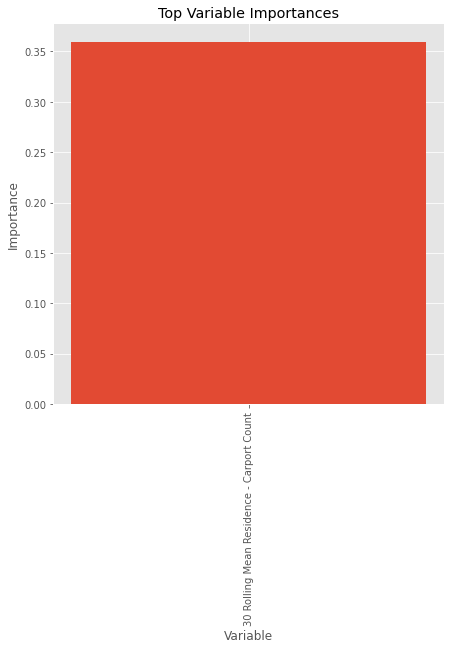

In [595]:
plotImportances(top_importances1, top_features_list1)

In [596]:
len(test_labels1[0])

61

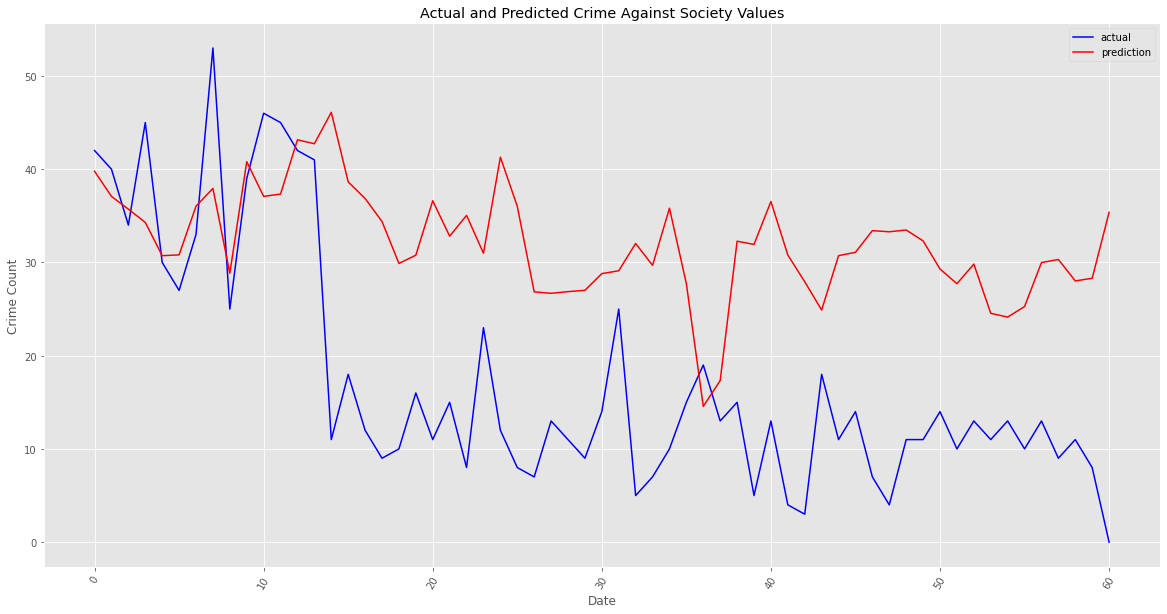

In [597]:
plt.plot(test_labels1[0], 'b-', label = 'actual')# Plot the predicted values
plt.plot(predictions, 'r-', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()# Graph labels
plt.xlabel('Date'); plt.ylabel('Crime Count'); plt.title('Actual and Predicted Crime Against Society Values');
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.show()

In [598]:
crimes_against_property_results = pd.DataFrame({'MAE Scores': [mae_list2[0], mae_list2[1], mae_list2[2], mae_list2[3], mae_list2[4]],
                        'MSE Scores': [mse_list2[0], mse_list2[1], mse_list2[2], mse_list2[3], mse_list2[4]],
                        'MAPE Scores': [mape_list2[0], mape_list2[1], mape_list2[2], mape_list2[3], mape_list2[4]]
                       })

                       
crimes_against_property_results.index = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3','Cluster 4']

In [599]:
crimes_against_property_results

,MAE Scores,MSE Scores,MAPE Scores
Cluster 0,9.281773,136.713331,0.225950
Cluster 1,5.402485,55.629590,0.326762
Cluster 2,5.770531,53.564359,0.333576
Cluster 3,8.116560,111.881545,0.267504
Cluster 4,7.008124,73.274840,0.319808


In [600]:
model.fit(training2[0], train_labels2[0])
predictions2 = model.predict(testing2[0])

/usr/local/lib/python3.6/dist-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


In [601]:
importances2 = list(model.feature_importances_)
feature_list2 = list(data_final[0].columns)
feature_importances2 = [(feature, importance) for feature, importance in zip(feature_list2,importances2)]
feature_importances2 = sorted(feature_importances2, key = lambda x: x[1], reverse=True)

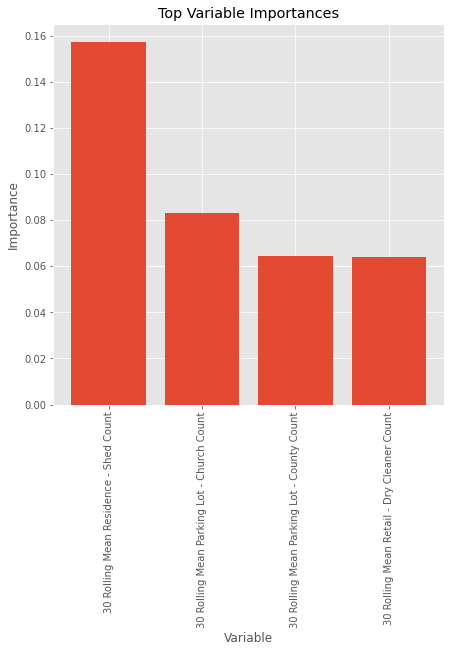

In [602]:
top_features_list2, top_importances2 = getImportances(feature_importances2)
plotImportances(top_importances2, top_features_list2)

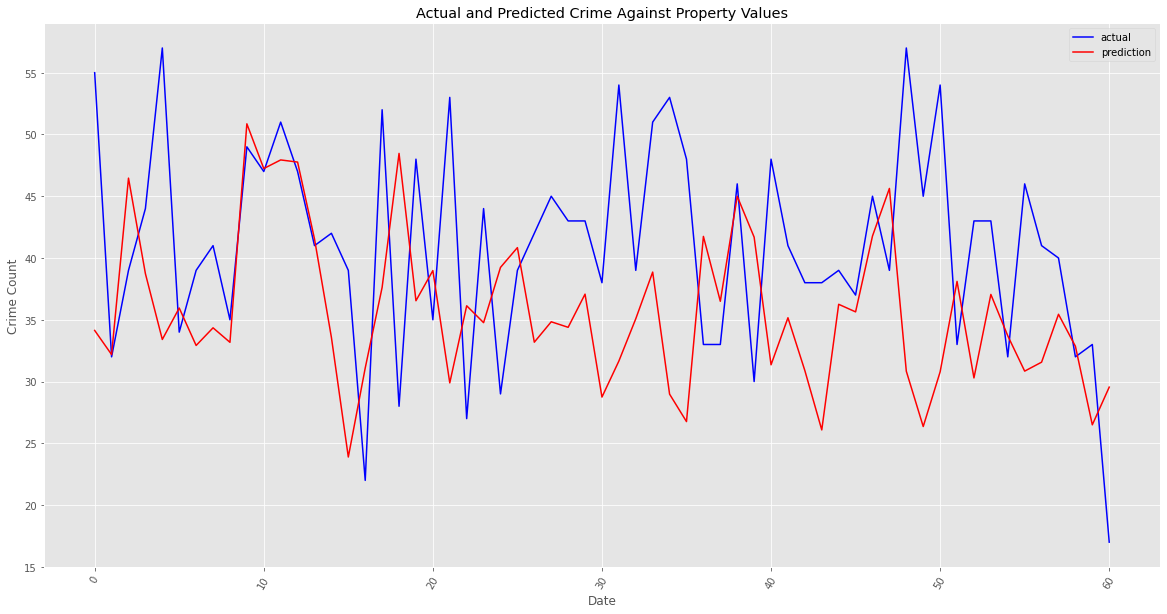

In [603]:
plt.plot(test_labels2[0], 'b-', label = 'actual')# Plot the predicted values
plt.plot(predictions2, 'r-', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()# Graph labels
plt.xlabel('Date'); plt.ylabel('Crime Count'); plt.title('Actual and Predicted Crime Against Property Values');
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.show()

In [604]:
crimes_against_persons_results = pd.DataFrame({'MAE Scores': [mae_list3[0], mae_list3[1], mae_list3[2], mae_list3[3], mae_list3[4]],
                        'MSE Scores': [mse_list3[0], mse_list3[1], mse_list3[2], mse_list3[3], mse_list3[4]],
                        'MAPE Scores': [mape_list3[0], mape_list3[1], mape_list3[2], mape_list3[3], mape_list3[4]]
                       })

                       
crimes_against_persons_results.index = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3','Cluster 4']

In [605]:
crimes_against_persons_results

,MAE Scores,MSE Scores,MAPE Scores
Cluster 0,2.601839,10.853710,0.474921
Cluster 1,2.573373,10.233080,1.045268
Cluster 2,2.515812,9.784113,1.005362
Cluster 3,2.522102,9.807566,0.584160
Cluster 4,2.223719,6.857379,0.462773


In [606]:
model.fit(training3[0], train_labels3[0])
predictions3 = model.predict(testing3[0])

/usr/local/lib/python3.6/dist-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


In [607]:
importances3 = list(model.feature_importances_)
feature_list3 = list(data_final[0].columns)
feature_importances3 = [(feature, importance) for feature, importance in zip(feature_list3,importances3)]
feature_importances3 = sorted(feature_importances3, key = lambda x: x[1], reverse=True)

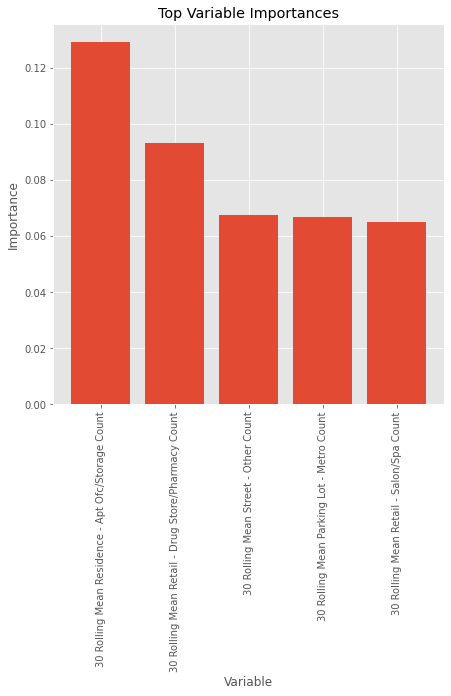

In [608]:
top_features_list3, top_importances3 = getImportances(feature_importances3)
plotImportances(top_importances3, top_features_list3)

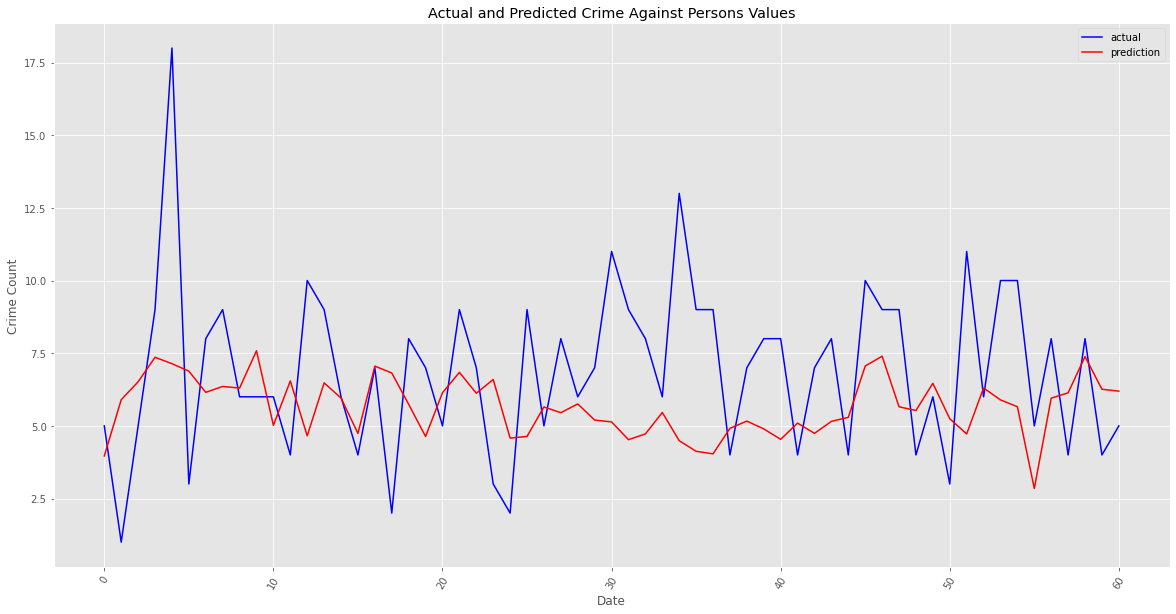

In [609]:
plt.plot(test_labels3[0], 'b-', label = 'actual')# Plot the predicted values
plt.plot(predictions3, 'r-', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()# Graph labels
plt.xlabel('Date'); plt.ylabel('Crime Count'); plt.title('Actual and Predicted Crime Against Persons Values');
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.show()

# Exponential Smoothing Models

In [610]:
training1 = []
training2 = []
training3 = []

testing1 = []
testing2 = []
testing3 = []

for i in range(len(features_list)):
    train = features_list[i]
    test = features_list[i]
    train1 = train[:180]
    train1 = train1['Crime Against Property Count']
    test1 = test[180:]
    test1 = test1['Crime Against Property Count']
    training1.append(train1)
    testing1.append(test1)
    
    train2 = train[:180]
    train2 = train2['Crime Against Society Count']
    test2 = test[180:]
    test2 = test2['Crime Against Society Count']
    training2.append(train2)
    testing2.append(test2)
    
    train3 = train[:180]
    train3 = train3['Crime Against Person Count']
    test3 = test[180:]
    test3 = test3['Crime Against Person Count']
    training3.append(train3)
    testing3.append(test3)

In [611]:
for i in range(len(testing1)):
    print(len(testing1[i]))

61
61
61
61
61


In [612]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

mae_list1 = []
mse_list1 = []
mape_list1 = []

mae_list2 = []
mse_list2 = []
mape_list2 = []

mae_list3 = []
mse_list3 = []
mape_list3 = []

for i in range(len(data_final)):
    
    
    triple_model = ExponentialSmoothing(training1[i],trend='add',seasonal='add').fit()
    
    if(len(testing1[i]) == 61):
        preds_triple = triple_model.forecast(61)
        mae1 = mean_absolute_error(testing1[i], preds_triple)
        mse1 = mean_squared_error(testing1[i], preds_triple)
        mape1 = mape(testing1[i], preds_triple)
        mae_list1.append(mae1)
        mse_list1.append(mse1)
        mape_list1.append(mape1)
    else:
        preds_triple = triple_model.forecast(60)
        mae1 = mean_absolute_error(testing1[i], preds_triple)
        mse1 = mean_squared_error(testing1[i], preds_triple)
        mape1 = mape(testing1[i], preds_triple)
        mae_list1.append(mae1)
        mse_list1.append(mse1)
        mape_list1.append(mape1)
        
    triple_model2 = ExponentialSmoothing(training2[i],trend='add',seasonal='add').fit()
    
    if(len(testing2[i]) == 61):
        preds_triple2 = triple_model2.forecast(61)
        mae2 = mean_absolute_error(testing2[i], preds_triple2)
        mse2 = mean_squared_error(testing2[i], preds_triple2)
        mape2 = mape(testing2[i], preds_triple2)
        mae_list2.append(mae2)
        mse_list2.append(mse2)
        mape_list2.append(mape2)
    else:
        preds_triple2 = triple_model2.forecast(60)
        mae2 = mean_absolute_error(testing2[i], preds_triple2)
        mse2 = mean_squared_error(testing2[i], preds_triple2)
        mape2 = mape(testing2[i], preds_triple2)
        mae_list2.append(mae2)
        mse_list2.append(mse2)
        mape_list2.append(mape2)
        
    triple_model3 = ExponentialSmoothing(training3[i],trend='add',seasonal='add').fit()    
    if(len(testing2[i]) == 61):
        preds_triple3 = triple_model3.forecast(61)
        mae3 = mean_absolute_error(testing3[i], preds_triple3)
        mse3 = mean_squared_error(testing3[i], preds_triple3)
        mape3 = mape(testing3[i], preds_triple3)
        mae_list3.append(mae3)
        mse_list3.append(mse3)
        mape_list3.append(mape3)
    else:
        preds_triple3 = triple_model3.forecast(60)
        mae3 = mean_absolute_error(testing3[i], preds_triple3)
        mse3 = mean_squared_error(testing3[i], preds_triple3)
        mape3 = mape(testing3[i], preds_triple3)
        mae_list3.append(mae3)
        mse_list3.append(mse3)
        mape_list3.append(mape3)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handl

In [613]:
crimes_against_property_results =  pd.DataFrame({'MAE Scores': [mae_list1[0], mae_list1[1], mae_list1[2], mae_list1[3], mae_list1[4]],
                        'MSE Scores': [mse_list1[0], mse_list1[1], mse_list1[2], mse_list1[3], mse_list1[4]],
                        'MAPE Scores': [mape_list1[0], mape_list1[1], mape_list1[2], mape_list1[3], mape_list1[4]]
                       })

                       
crimes_against_property_results.index = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3','Cluster 4']

In [614]:
crimes_against_property_results

,MAE Scores,MSE Scores,MAPE Scores
Cluster 0,9.622922,140.595127,0.279101
Cluster 1,6.306582,60.434143,0.467693
Cluster 2,7.841974,90.733216,0.500535
Cluster 3,8.753395,116.625081,0.316262
Cluster 4,6.801274,85.651108,0.269258


In [615]:
train_data = features[:180]
test_data = features[180:]

In [616]:
triple_model = ExponentialSmoothing(train_data['Crime Against Property Count'],trend='add',seasonal='add').fit()
preds_triple = triple_model.forecast(61)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


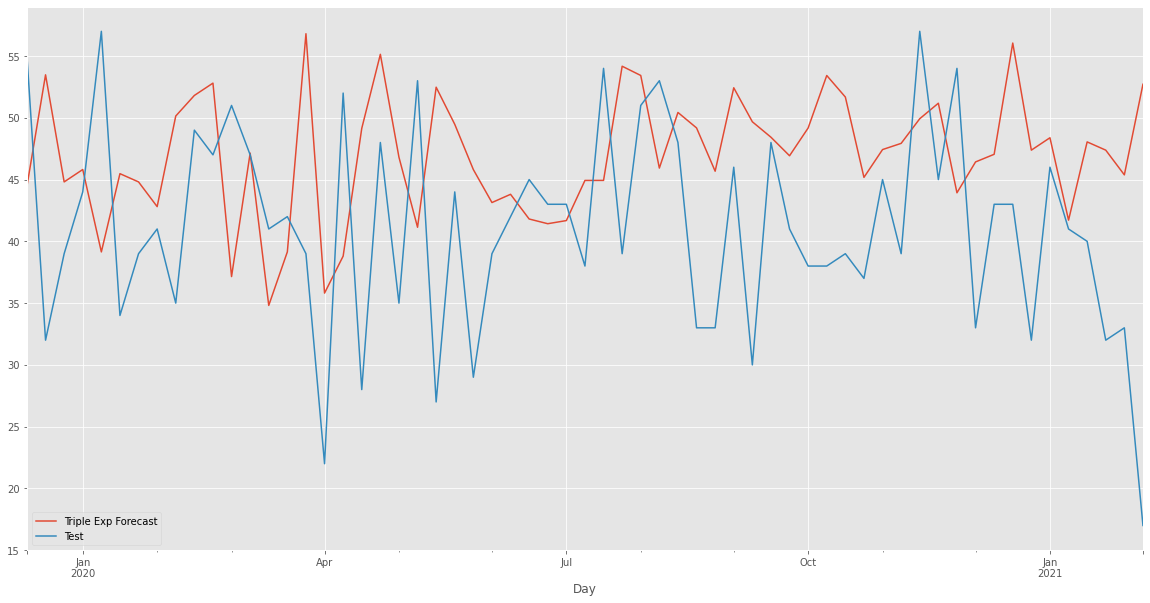

In [617]:
preds_triple.plot(legend=True,label='Triple Exp Forecast')
test_data['Crime Against Property Count'].plot(legend=True,label='Test')
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.show()

In [618]:
mae1 = mean_absolute_error(test_data['Crime Against Property Count'], preds_triple)
mae1

9.62292174691761

In [619]:
mse1 = mean_squared_error(test_data['Crime Against Property Count'], preds_triple)
mse1

140.59512735012805

In [620]:
mape1 = mape(test_data['Crime Against Property Count'], preds_triple)
mape1

0.27910120183154885

In [621]:
crimes_against_society_results = pd.DataFrame({'MAE Scores': [mae_list2[0], mae_list2[1], mae_list2[2], mae_list2[3], mae_list2[4]],
                        'MSE Scores': [mse_list2[0], mse_list2[1], mse_list2[2], mse_list2[3], mse_list2[4]],
                        'MAPE Scores': [mape_list2[0], mape_list2[1], mape_list2[2], mape_list2[3], mape_list2[4]]
                       })

                       
crimes_against_society_results.index = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3','Cluster 4']

In [622]:
crimes_against_society_results

,MAE Scores,MSE Scores,MAPE Scores
Cluster 0,22.737036,640.522180,2.432722
Cluster 1,4.292821,31.143912,1.171865
Cluster 2,4.544155,28.370849,1.601956
Cluster 3,13.164647,222.609888,1.751158
Cluster 4,7.885379,80.619424,1.529405


In [623]:
triple_model = ExponentialSmoothing(train_data['Crime Against Society Count'],trend='add',seasonal='add').fit()
preds_triple = triple_model.forecast(61)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


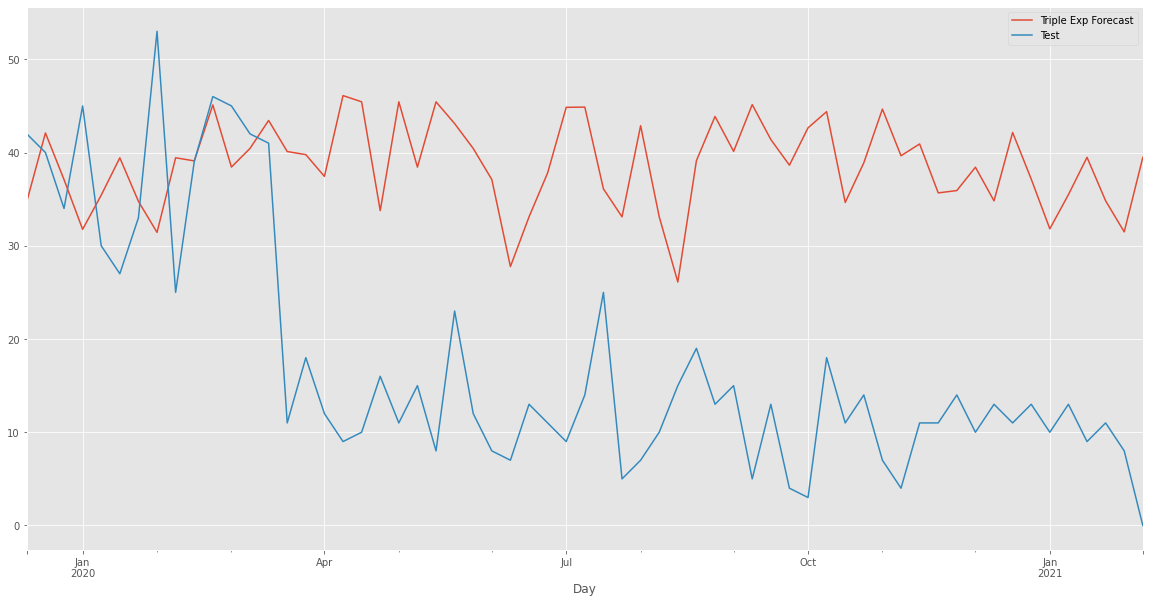

In [624]:
preds_triple.plot(legend=True,label='Triple Exp Forecast')
test_data['Crime Against Society Count'].plot(legend=True,label='Test')
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.show()

In [625]:
mae1 = mean_absolute_error(test_data['Crime Against Society Count'], preds_triple)
mae1

22.737036351561176

In [626]:
mse1 = mean_squared_error(test_data['Crime Against Society Count'], preds_triple)
mse1

640.5221798150898

In [627]:
mape1 = mape(test_data['Crime Against Society Count'], preds_triple)
mape1

2.4327222862202302

In [628]:
crimes_against_persons_results = pd.DataFrame({'MAE Scores': [mae_list3[0], mae_list3[1], mae_list3[2], mae_list3[3], mae_list3[4]],
                        'MSE Scores': [mse_list3[0], mse_list3[1], mse_list3[2], mse_list3[3], mse_list3[4]],
                        'MAPE Scores': [mape_list3[0], mape_list3[1], mape_list3[2], mape_list3[3], mape_list3[4]]
                       })

                       
crimes_against_persons_results.index = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3','Cluster 4']

In [629]:
crimes_against_persons_results

,MAE Scores,MSE Scores,MAPE Scores
Cluster 0,2.756041,12.321875,0.611833
Cluster 1,2.346910,8.199555,0.880268
Cluster 2,1.946204,5.856730,0.760846
Cluster 3,3.318405,15.788399,0.815574
Cluster 4,2.050475,6.912164,0.413122


In [630]:
triple_model = ExponentialSmoothing(train_data['Crime Against Person Count'],trend='add',seasonal='add').fit()
preds_triple = triple_model.forecast(61)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


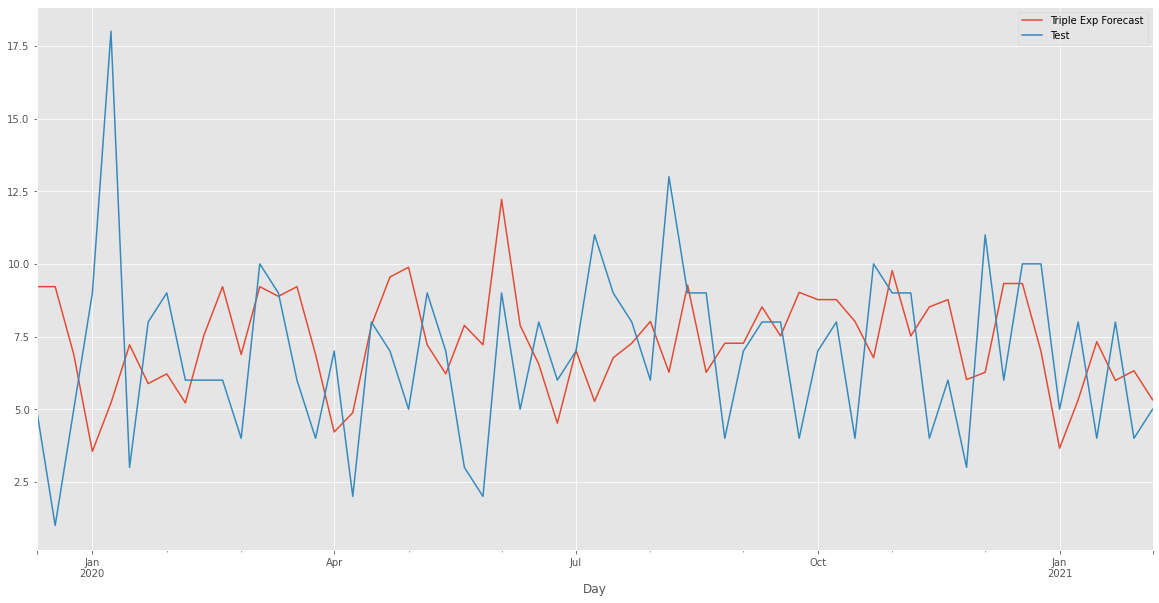

In [631]:
preds_triple.plot(legend=True,label='Triple Exp Forecast')
test_data['Crime Against Person Count'].plot(legend=True,label='Test')
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.show()

In [632]:
mae1 = mean_absolute_error(test_data['Crime Against Person Count'], preds_triple)
mae1

2.7560409062922715

In [633]:
mse1 = mean_squared_error(test_data['Crime Against Person Count'], preds_triple)
mse1

12.321874698273922

In [634]:
mape1 = mape(test_data['Crime Against Person Count'], preds_triple)
mape1

0.6118325861916311